<a href="https://colab.research.google.com/github/weimarquintero/UDEA-ai4eng-20242/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creando el kaggle.json para descargar los datos directamente desde Kaggle.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


Descomprimiendo el fichero y contando el numero de lineas de cada archivo.

In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


Importando las librerias necesarias para trabajar.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Cargando el dataframe de entrenamiento y validando sus dimensiones.

In [ ]:
df_train = pd.read_csv("train.csv")
print ("shape of loaded dataframe", df_train.shape)

shape of loaded dataframe (692500, 12)


Mostrando los primeros datos del dataframe.

In [ ]:
df_train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Explorando algunas de las columnas que podrian tener mayor influencia en los resultados para posteriormente crear un modelo.

In [ ]:
df_train = df_train[['ESTU_PRGM_DEPARTAMENTO','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET','RENDIMIENTO_GLOBAL']]
df_train.head()

,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Si,medio-alto
1,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,No,bajo
2,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Si,bajo
3,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Si,alto
4,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Si,medio-bajo


Mostrando la distribución de los datos.

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

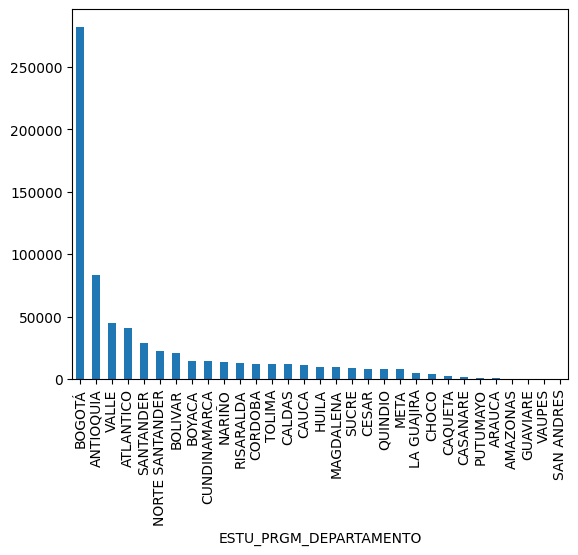

In [ ]:
df_train.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

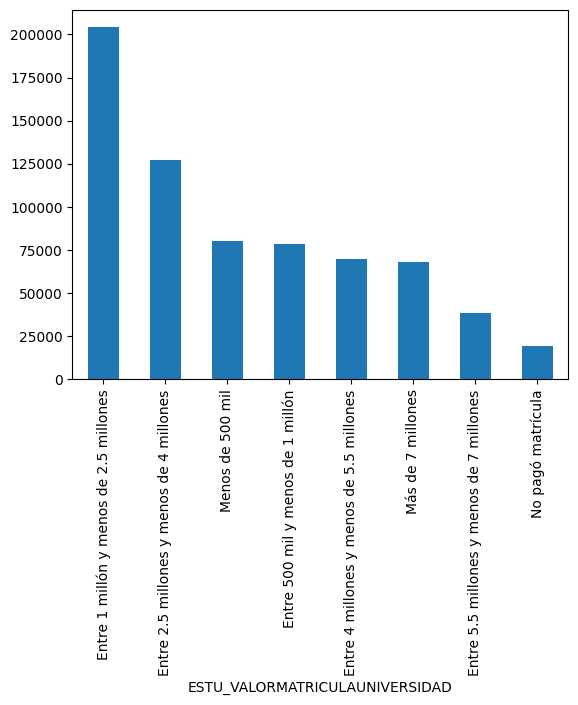

In [ ]:
df_train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

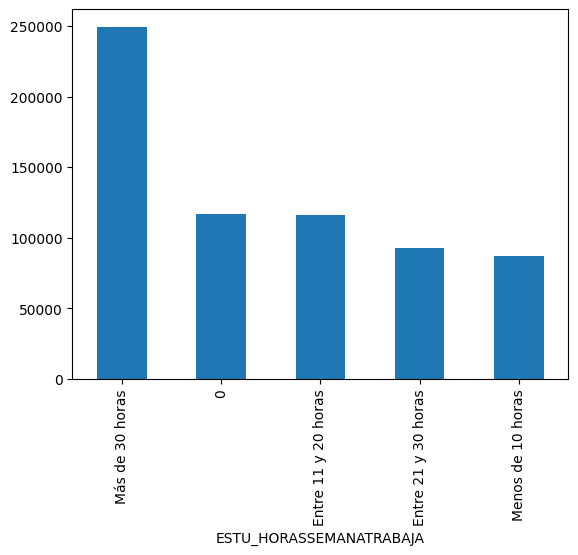

In [ ]:
df_train.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_TIENEINTERNET'>

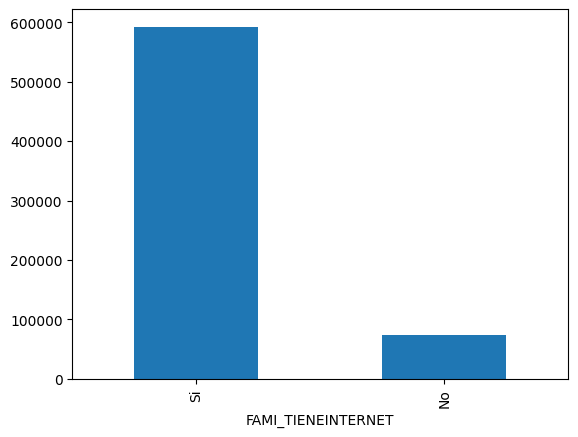

In [ ]:
df_train.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

Instalando la libreria rlxutils para inspeccionar visualmente los datos.

In [ ]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11101 sha256=60d4a150f65dec67708514e9e55a8c16770d4cd6ba134336096aeb941436f8a4
  Stored in directory: /root/.cache/pip/wheels/9a/45/da/49bdb0e82cc7a605e9c05dc24265687c5f349b53dcb74728e2
Successfully built rlxutils


Creando las vistas para inspeccionar los datos.

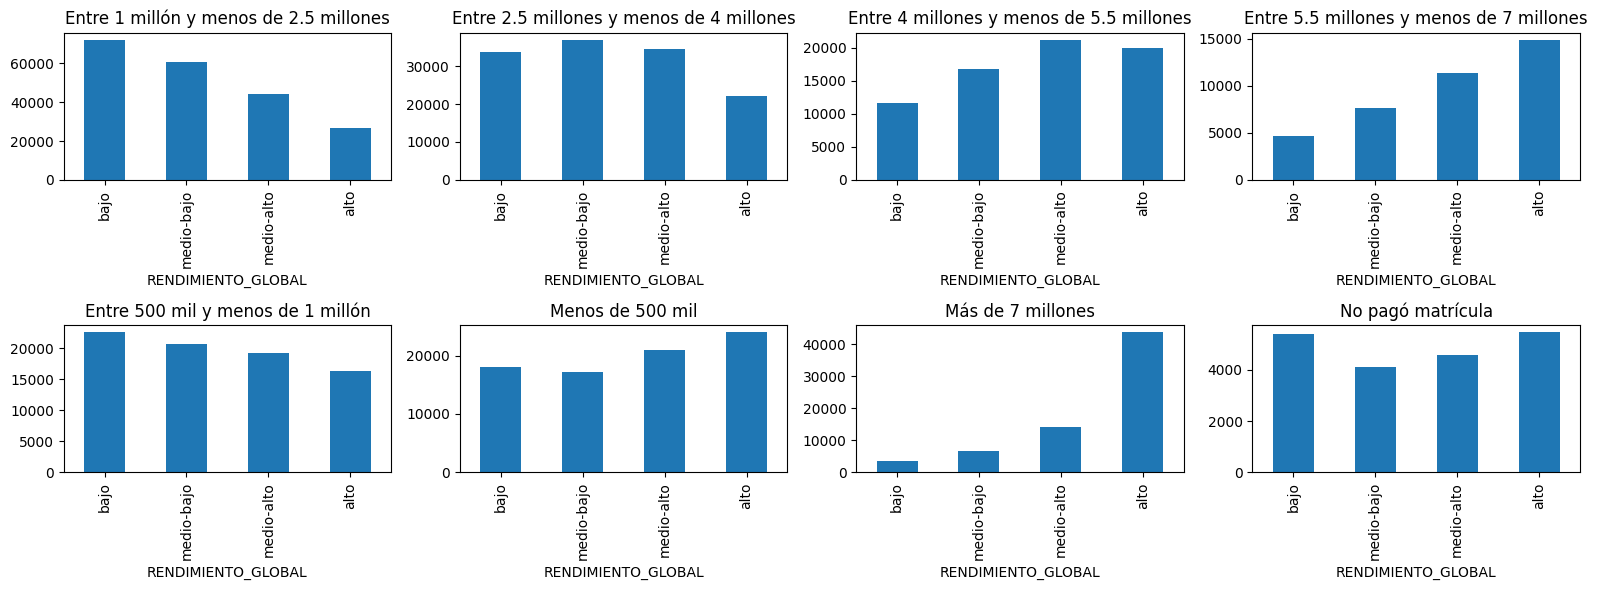

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(df_train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    df_c = df_train[df_train.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    df_c.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

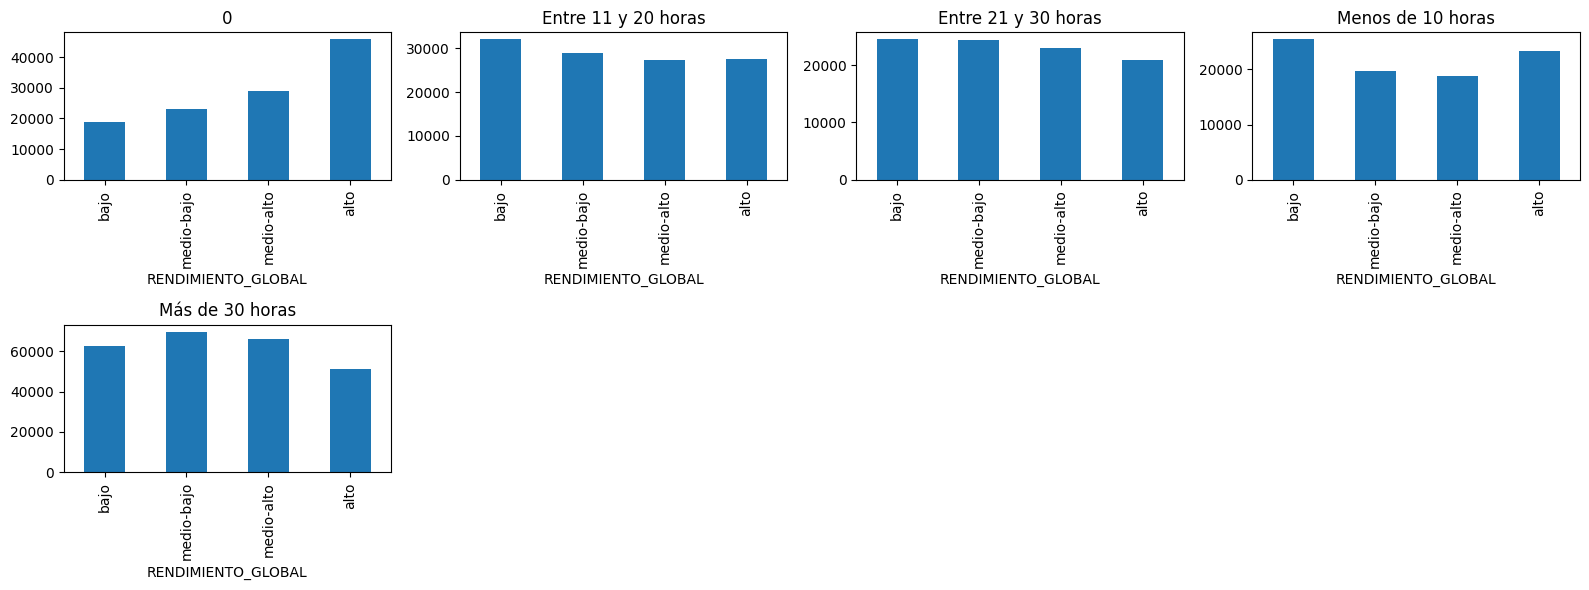

In [ ]:
c = sorted(df_train.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    df_c = df_train[df_train.ESTU_HORASSEMANATRABAJA==ci]
    df_c.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

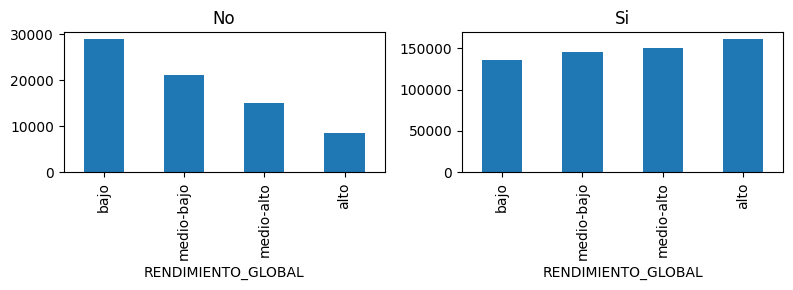

In [ ]:
c = sorted(df_train.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    df_c = df_train[df_train.FAMI_TIENEINTERNET==ci]
    df_c.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)